In [44]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
tr_data = pd.read_csv('../data/merged_221220_221231_with_contracts.csv')
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,eth_hour,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,2022-12-19 21:00:00,True,17.248596,0.0,False,99.865409,117114004578,117114004578,189564,117114004578
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,2022-12-19 21:00:00,True,17.248596,0.0,False,6.684293,23932889038,23932889038,214272,23932889038
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,2022-12-19 21:00:00,True,17.248596,0.0,False,0.000000,17248595741,17248595741,152585,17248595741
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,...,2022-12-19 21:00:00,True,17.248596,3.0,False,0.963838,0,0,208202,18212433401
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,2022-12-19 21:00:00,True,17.248596,0.0,False,3.550201,20798797016,20798797016,122513,20798797016


In [3]:
quantiles = tr_data.priority_fee.quantile(np.arange(0.01,1,0.01))
shifted_quantiles = tr_data.priority_fee.quantile(np.arange(0.02,1.01,0.01))

In [4]:
quantiles.keys()

Float64Index([                0.01,                 0.02,                 0.03,
                              0.04,                 0.05, 0.060000000000000005,
               0.06999999999999999,                 0.08,                 0.09,
               0.09999999999999999,                 0.11,                 0.12,
                              0.13,                 0.14,  0.15000000000000002,
                              0.16,                 0.17,  0.18000000000000002,
                              0.19,                  0.2,  0.21000000000000002,
                              0.22,                 0.23,  0.24000000000000002,
                              0.25,                 0.26,                 0.27,
                              0.28,  0.29000000000000004,                  0.3,
                              0.31,                 0.32,                 0.33,
                              0.34,  0.35000000000000003,  0.36000000000000004,
                              0.37,     

In [5]:
q_list = [.7,.75,.8,.85,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99]

In [6]:
for left_q, right_q in zip(quantiles.keys(),shifted_quantiles.keys()):
    left_pf, right_pf = quantiles[left_q], shifted_quantiles[right_q]
    print(f'{left_q:.2f} fee quantile: {left_pf:.5f} gwei | {right_q:.2f} fee quantile: {right_pf:.5f} gwei')
    q_data = tr_data.query(f'priority_fee >= {left_pf} and priority_fee <= {right_pf}')
    
    non_ofac_q_data = q_data[~q_data.is_ofac]
    ofac_q_data = q_data[q_data.is_ofac]
    
    non_ofac_quantiles = non_ofac_q_data.wait_time_adjusted.quantile(q_list)
    
    for q in non_ofac_quantiles.keys():
        ofac_over_quantile_count = len(ofac_q_data[ofac_q_data.wait_time_adjusted >= non_ofac_quantiles[q]])
        
        print(f'{q:.2f} time quantile: {ofac_over_quantile_count} transactions suspended to be cansored')
        
    print('-------------------------------------')

0.01 fee quantile: 0.00000 gwei | 0.02 fee quantile: 0.05913 gwei
0.70 time quantile: 2 transactions suspended to be cansored
0.75 time quantile: 2 transactions suspended to be cansored
0.80 time quantile: 2 transactions suspended to be cansored
0.85 time quantile: 0 transactions suspended to be cansored
0.90 time quantile: 0 transactions suspended to be cansored
0.91 time quantile: 0 transactions suspended to be cansored
0.92 time quantile: 0 transactions suspended to be cansored
0.93 time quantile: 0 transactions suspended to be cansored
0.94 time quantile: 0 transactions suspended to be cansored
0.95 time quantile: 0 transactions suspended to be cansored
0.96 time quantile: 0 transactions suspended to be cansored
0.97 time quantile: 0 transactions suspended to be cansored
0.98 time quantile: 0 transactions suspended to be cansored
0.99 time quantile: 0 transactions suspended to be cansored
-------------------------------------
0.02 fee quantile: 0.05913 gwei | 0.03 fee quantile: 0.1

0.70 time quantile: 1 transactions suspended to be cansored
0.75 time quantile: 1 transactions suspended to be cansored
0.80 time quantile: 1 transactions suspended to be cansored
0.85 time quantile: 0 transactions suspended to be cansored
0.90 time quantile: 0 transactions suspended to be cansored
0.91 time quantile: 0 transactions suspended to be cansored
0.92 time quantile: 0 transactions suspended to be cansored
0.93 time quantile: 0 transactions suspended to be cansored
0.94 time quantile: 0 transactions suspended to be cansored
0.95 time quantile: 0 transactions suspended to be cansored
0.96 time quantile: 0 transactions suspended to be cansored
0.97 time quantile: 0 transactions suspended to be cansored
0.98 time quantile: 0 transactions suspended to be cansored
0.99 time quantile: 0 transactions suspended to be cansored
-------------------------------------
0.11 fee quantile: 0.43298 gwei | 0.12 fee quantile: 0.51344 gwei
0.70 time quantile: 7 transactions suspended to be canso

0.70 time quantile: 80 transactions suspended to be cansored
0.75 time quantile: 74 transactions suspended to be cansored
0.80 time quantile: 65 transactions suspended to be cansored
0.85 time quantile: 65 transactions suspended to be cansored
0.90 time quantile: 60 transactions suspended to be cansored
0.91 time quantile: 57 transactions suspended to be cansored
0.92 time quantile: 53 transactions suspended to be cansored
0.93 time quantile: 52 transactions suspended to be cansored
0.94 time quantile: 48 transactions suspended to be cansored
0.95 time quantile: 45 transactions suspended to be cansored
0.96 time quantile: 40 transactions suspended to be cansored
0.97 time quantile: 37 transactions suspended to be cansored
0.98 time quantile: 28 transactions suspended to be cansored
0.99 time quantile: 9 transactions suspended to be cansored
-------------------------------------
0.20 fee quantile: 1.00000 gwei | 0.21 fee quantile: 1.00000 gwei
0.70 time quantile: 80 transactions suspend

0.70 time quantile: 360 transactions suspended to be cansored
0.75 time quantile: 360 transactions suspended to be cansored
0.80 time quantile: 322 transactions suspended to be cansored
0.85 time quantile: 277 transactions suspended to be cansored
0.90 time quantile: 258 transactions suspended to be cansored
0.91 time quantile: 258 transactions suspended to be cansored
0.92 time quantile: 258 transactions suspended to be cansored
0.93 time quantile: 244 transactions suspended to be cansored
0.94 time quantile: 244 transactions suspended to be cansored
0.95 time quantile: 225 transactions suspended to be cansored
0.96 time quantile: 216 transactions suspended to be cansored
0.97 time quantile: 206 transactions suspended to be cansored
0.98 time quantile: 180 transactions suspended to be cansored
0.99 time quantile: 145 transactions suspended to be cansored
-------------------------------------
0.29 fee quantile: 1.50000 gwei | 0.30 fee quantile: 1.50000 gwei
0.70 time quantile: 355 tran

0.70 time quantile: 355 transactions suspended to be cansored
0.75 time quantile: 355 transactions suspended to be cansored
0.80 time quantile: 318 transactions suspended to be cansored
0.85 time quantile: 273 transactions suspended to be cansored
0.90 time quantile: 254 transactions suspended to be cansored
0.91 time quantile: 254 transactions suspended to be cansored
0.92 time quantile: 254 transactions suspended to be cansored
0.93 time quantile: 240 transactions suspended to be cansored
0.94 time quantile: 240 transactions suspended to be cansored
0.95 time quantile: 221 transactions suspended to be cansored
0.96 time quantile: 212 transactions suspended to be cansored
0.97 time quantile: 202 transactions suspended to be cansored
0.98 time quantile: 176 transactions suspended to be cansored
0.99 time quantile: 141 transactions suspended to be cansored
-------------------------------------
0.38 fee quantile: 1.50000 gwei | 0.39 fee quantile: 1.50000 gwei
0.70 time quantile: 355 tran

0.70 time quantile: 355 transactions suspended to be cansored
0.75 time quantile: 355 transactions suspended to be cansored
0.80 time quantile: 318 transactions suspended to be cansored
0.85 time quantile: 273 transactions suspended to be cansored
0.90 time quantile: 254 transactions suspended to be cansored
0.91 time quantile: 254 transactions suspended to be cansored
0.92 time quantile: 254 transactions suspended to be cansored
0.93 time quantile: 240 transactions suspended to be cansored
0.94 time quantile: 240 transactions suspended to be cansored
0.95 time quantile: 221 transactions suspended to be cansored
0.96 time quantile: 212 transactions suspended to be cansored
0.97 time quantile: 202 transactions suspended to be cansored
0.98 time quantile: 176 transactions suspended to be cansored
0.99 time quantile: 141 transactions suspended to be cansored
-------------------------------------
0.47 fee quantile: 1.50000 gwei | 0.48 fee quantile: 1.50000 gwei
0.70 time quantile: 355 tran

0.70 time quantile: 355 transactions suspended to be cansored
0.75 time quantile: 355 transactions suspended to be cansored
0.80 time quantile: 318 transactions suspended to be cansored
0.85 time quantile: 273 transactions suspended to be cansored
0.90 time quantile: 254 transactions suspended to be cansored
0.91 time quantile: 254 transactions suspended to be cansored
0.92 time quantile: 254 transactions suspended to be cansored
0.93 time quantile: 240 transactions suspended to be cansored
0.94 time quantile: 240 transactions suspended to be cansored
0.95 time quantile: 221 transactions suspended to be cansored
0.96 time quantile: 212 transactions suspended to be cansored
0.97 time quantile: 202 transactions suspended to be cansored
0.98 time quantile: 176 transactions suspended to be cansored
0.99 time quantile: 141 transactions suspended to be cansored
-------------------------------------
0.56 fee quantile: 1.50000 gwei | 0.57 fee quantile: 1.50000 gwei
0.70 time quantile: 355 tran

0.98 time quantile: 0 transactions suspended to be cansored
0.99 time quantile: 0 transactions suspended to be cansored
-------------------------------------
0.64 fee quantile: 1.93029 gwei | 0.65 fee quantile: 2.00000 gwei
0.70 time quantile: 213 transactions suspended to be cansored
0.75 time quantile: 207 transactions suspended to be cansored
0.80 time quantile: 207 transactions suspended to be cansored
0.85 time quantile: 196 transactions suspended to be cansored
0.90 time quantile: 190 transactions suspended to be cansored
0.91 time quantile: 190 transactions suspended to be cansored
0.92 time quantile: 190 transactions suspended to be cansored
0.93 time quantile: 190 transactions suspended to be cansored
0.94 time quantile: 188 transactions suspended to be cansored
0.95 time quantile: 186 transactions suspended to be cansored
0.96 time quantile: 180 transactions suspended to be cansored
0.97 time quantile: 174 transactions suspended to be cansored
0.98 time quantile: 156 transact

0.70 time quantile: 205 transactions suspended to be cansored
0.75 time quantile: 200 transactions suspended to be cansored
0.80 time quantile: 200 transactions suspended to be cansored
0.85 time quantile: 189 transactions suspended to be cansored
0.90 time quantile: 184 transactions suspended to be cansored
0.91 time quantile: 184 transactions suspended to be cansored
0.92 time quantile: 184 transactions suspended to be cansored
0.93 time quantile: 184 transactions suspended to be cansored
0.94 time quantile: 182 transactions suspended to be cansored
0.95 time quantile: 180 transactions suspended to be cansored
0.96 time quantile: 174 transactions suspended to be cansored
0.97 time quantile: 168 transactions suspended to be cansored
0.98 time quantile: 150 transactions suspended to be cansored
0.99 time quantile: 130 transactions suspended to be cansored
-------------------------------------
0.74 fee quantile: 2.00000 gwei | 0.75 fee quantile: 2.00000 gwei
0.70 time quantile: 205 tran

0.70 time quantile: 1 transactions suspended to be cansored
0.75 time quantile: 1 transactions suspended to be cansored
0.80 time quantile: 1 transactions suspended to be cansored
0.85 time quantile: 1 transactions suspended to be cansored
0.90 time quantile: 1 transactions suspended to be cansored
0.91 time quantile: 1 transactions suspended to be cansored
0.92 time quantile: 1 transactions suspended to be cansored
0.93 time quantile: 1 transactions suspended to be cansored
0.94 time quantile: 1 transactions suspended to be cansored
0.95 time quantile: 1 transactions suspended to be cansored
0.96 time quantile: 1 transactions suspended to be cansored
0.97 time quantile: 1 transactions suspended to be cansored
0.98 time quantile: 0 transactions suspended to be cansored
0.99 time quantile: 0 transactions suspended to be cansored
-------------------------------------
0.83 fee quantile: 2.50000 gwei | 0.84 fee quantile: 2.68084 gwei
0.70 time quantile: 21 transactions suspended to be cans

0.92 time quantile: 5 transactions suspended to be cansored
0.93 time quantile: 5 transactions suspended to be cansored
0.94 time quantile: 5 transactions suspended to be cansored
0.95 time quantile: 5 transactions suspended to be cansored
0.96 time quantile: 4 transactions suspended to be cansored
0.97 time quantile: 2 transactions suspended to be cansored
0.98 time quantile: 2 transactions suspended to be cansored
0.99 time quantile: 0 transactions suspended to be cansored
-------------------------------------
0.92 fee quantile: 5.06801 gwei | 0.93 fee quantile: 6.00000 gwei
0.70 time quantile: 6 transactions suspended to be cansored
0.75 time quantile: 4 transactions suspended to be cansored
0.80 time quantile: 4 transactions suspended to be cansored
0.85 time quantile: 4 transactions suspended to be cansored
0.90 time quantile: 3 transactions suspended to be cansored
0.91 time quantile: 3 transactions suspended to be cansored
0.92 time quantile: 3 transactions suspended to be canso

In [7]:
fee_q_set = set()

In [8]:
for left_q, right_q in zip(quantiles.keys(),shifted_quantiles.keys()):
    left_pf, right_pf = quantiles[left_q], shifted_quantiles[right_q]
    left_pf, right_pf = round(left_pf,3), round(right_pf,3)
    
    if (left_pf != right_pf):
        fee_q_set.add((left_pf, right_pf))

In [9]:
cdf = pd.DataFrame()

In [10]:
for left_pf, right_pf in fee_q_set:
    q_data = tr_data.query(f'priority_fee >= {left_pf} and priority_fee < {right_pf}')
    
    non_ofac_q_data = q_data[~q_data.is_ofac]
    ofac_q_data = q_data[q_data.is_ofac]
    
    non_ofac_quantiles = non_ofac_q_data.wait_time_adjusted.quantile(q_list)
    
    dct = {'left_fee_border': left_pf, 'right_fee_border': right_pf, 'fee_interval': (left_pf, right_pf)}
    
    for q in non_ofac_quantiles.keys():
        ofac_over_quantile_count = len(ofac_q_data[ofac_q_data.wait_time_adjusted >= non_ofac_quantiles[q]])
        
        dct[f'{q} percentile'] = ofac_over_quantile_count
        
    cdf = cdf.append(dct, ignore_index=True)

In [11]:
cdf

,0.7 percentile,0.75 percentile,0.8 percentile,0.85 percentile,0.9 percentile,0.91 percentile,0.92 percentile,0.93 percentile,0.94 percentile,0.95 percentile,0.96 percentile,0.97 percentile,0.98 percentile,0.99 percentile,fee_interval,left_fee_border,right_fee_border
0,8.0,7.0,6.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"(0.168, 0.196)",0.168,0.196
1,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.513, 0.611)",0.513,0.611
2,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,"(3.319, 3.705)",3.319,3.705
3,8.0,8.0,6.0,5.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,"(0.835, 0.969)",0.835,0.969
4,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,"(33.305, 504695.879)",33.305,504695.879
5,15.0,15.0,15.0,14.0,12.0,12.0,12.0,12.0,12.0,12.0,11.0,9.0,8.0,1.0,"(2.681, 2.974)",2.681,2.974
6,21.0,21.0,21.0,20.0,19.0,19.0,19.0,18.0,16.0,16.0,14.0,13.0,12.0,1.0,"(2.185, 2.42)",2.185,2.420
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,"(4.065, 4.691)",4.065,4.691
8,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,2.0,2.0,0.0,"(4.691, 5.068)",4.691,5.068
9,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.196, 0.226)",0.196,0.226


In [12]:
cdf = cdf.sort_values('left_fee_border')

In [13]:
cdf

,0.7 percentile,0.75 percentile,0.8 percentile,0.85 percentile,0.9 percentile,0.91 percentile,0.92 percentile,0.93 percentile,0.94 percentile,0.95 percentile,0.96 percentile,0.97 percentile,0.98 percentile,0.99 percentile,fee_interval,left_fee_border,right_fee_border
10,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.059)",0.000,0.059
46,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.059, 0.117)",0.059,0.117
20,9.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.117, 0.144)",0.117,0.144
28,7.0,6.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.144, 0.168)",0.144,0.168
0,8.0,7.0,6.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"(0.168, 0.196)",0.168,0.196
9,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.196, 0.226)",0.196,0.226
29,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.226, 0.257)",0.226,0.257
38,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.257, 0.302)",0.257,0.302
41,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.302, 0.361)",0.302,0.361
23,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.361, 0.433)",0.361,0.433


In [41]:
sub_df = cdf.drop(['left_fee_border','right_fee_border'],axis=1)

In [37]:


fig = go.Figure(data=bars)
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

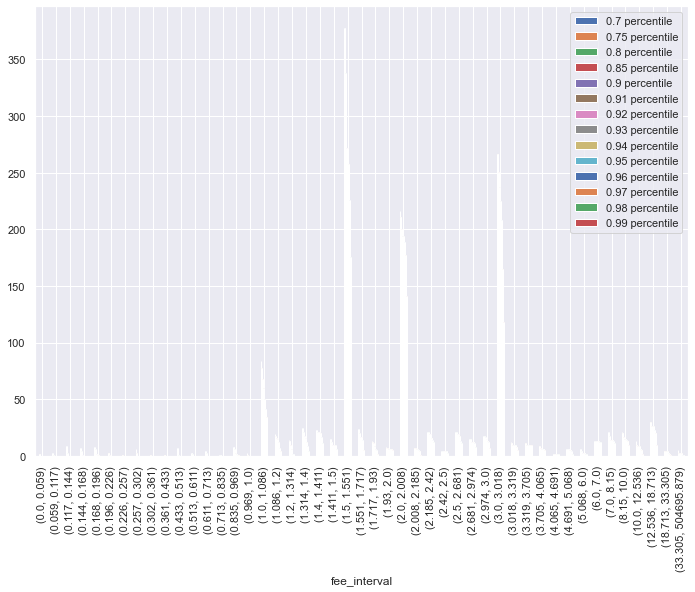

In [61]:
plot = sub_df.plot(x='fee_interval',
        kind='bar',
        stacked=False)